<a href="https://colab.research.google.com/github/pxs1990/pyspark_project/blob/main/RandomForest_with_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=44256fae9ec8894b8b8444af9b31828f37ab4ce652c09e0b5c2e69d5aaa136d2
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
sparkSession=SparkSession.builder.appName('Practise').getOrCreate()

In [37]:
df=sparkSession.read.csv('/content/BankCustomerChurn_Dataset.csv',header=True,inferSchema=True)
df.show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602| Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|     Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|     Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93

In [19]:
from pyspark.sql.functions import col, count, isnan, when
df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()

+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|Surname|CreditScore|Geography|Gender|Age|Tenure|Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|        0|         0|      0|          0|        0|     0|  0|     0|      0|            0|        0|             0|              0|     0|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+



In [16]:
df.describe().show()

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

In [17]:
from pyspark.sql.functions import col

# List of categorical (string) columns
cat_cols = [col_name for col_name, col_type in df.dtypes if col_type == 'string']

# Describe categorical columns
df.select(cat_cols).describe().show()

+-------+-------+---------+------+
|summary|Surname|Geography|Gender|
+-------+-------+---------+------+
|  count|  10000|    10000| 10000|
|   mean|   NULL|     NULL|  NULL|
| stddev|   NULL|     NULL|  NULL|
|    min|  Abazu|   France|Female|
|    max| Zuyeva|    Spain|  Male|
+-------+-------+---------+------+



In PySpark, you typically use distributed computing to handle large datasets. However, when it comes to data visualization, PySpark itself does not have built-in visualization capabilities like Pandas or other data visualization libraries. Therefore, to visualize data in PySpark, you typically convert your PySpark DataFrame into a Pandas DataFrame and then use Pandas or other libraries like Matplotlib, Seaborn, or Plotly for visualization.

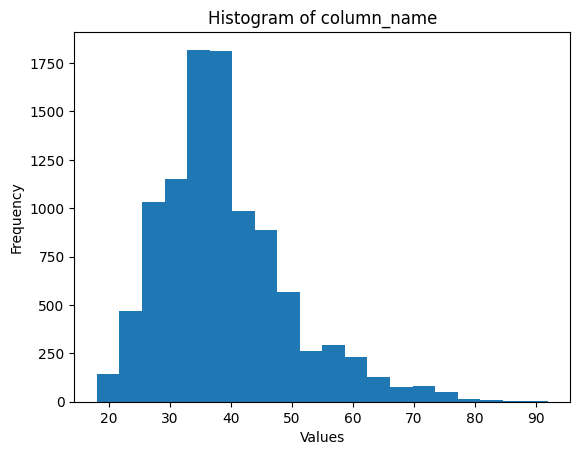

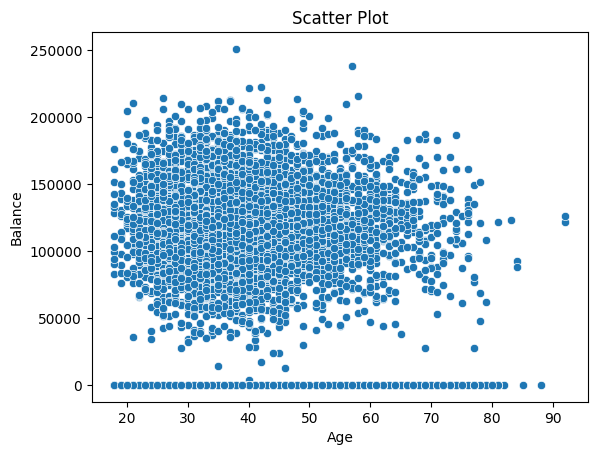

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Perform data visualization using Pandas and Matplotlib or Seaborn
# Example: Histogram
plt.hist(pandas_df['Age'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()

# Example: Scatter Plot
sns.scatterplot(data=pandas_df, x='Age', y='Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot')
plt.show()

# Remember to adjust visualization types and parameters based on your data and requirements.

In [38]:
df=df.drop("Surname")

In [39]:
df.show()

+---------+----------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|     0|
|        5|  15737888|        850|    Spain|Female| 43|

In [27]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# **Conver cat data to numeric:**

In [40]:
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=col+'_index')
    df = indexer.fit(df).transform(df).drop(col)


In [41]:
df.show()

+---------+----------+-----------+---+------+---------+-------------+---------+--------------+---------------+------+---------------+------------+
|RowNumber|CustomerId|CreditScore|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|Geography_index|Gender_index|
+---------+----------+-----------+---+------+---------+-------------+---------+--------------+---------------+------+---------------+------------+
|        1|  15634602|        619| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|            0.0|         1.0|
|        2|  15647311|        608| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|            2.0|         1.0|
|        3|  15619304|        502| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|            0.0|         1.0|
|        4|  15701354|        699| 39|     1|      0.0|            2|        0|             0|       93826.63|     0| 

# ** Assembling feautures: Combining  columns into a single feature vector: **

In [42]:
feature_cols = [col for col in df.columns if col not in ['RowNumber', 'CustomerId', 'Surname', 'Exited']]
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df = assembler.transform(df).select('features', 'Exited')

In [43]:
df.show()

+--------------------+------+
|            features|Exited|
+--------------------+------+
|[619.0,42.0,2.0,0...|     1|
|[608.0,41.0,1.0,8...|     0|
|[502.0,42.0,8.0,1...|     1|
|[699.0,39.0,1.0,0...|     0|
|[850.0,43.0,2.0,1...|     0|
|[645.0,44.0,8.0,1...|     1|
|[822.0,50.0,7.0,0...|     0|
|[376.0,29.0,4.0,1...|     1|
|[501.0,44.0,4.0,1...|     0|
|[684.0,27.0,2.0,1...|     0|
|[528.0,31.0,6.0,1...|     0|
|[497.0,24.0,3.0,0...|     0|
|[476.0,34.0,10.0,...|     0|
|[549.0,25.0,5.0,0...|     0|
|[635.0,35.0,7.0,0...|     0|
|[616.0,45.0,3.0,1...|     0|
|[653.0,58.0,1.0,1...|     1|
|[549.0,24.0,9.0,0...|     0|
|[587.0,45.0,6.0,0...|     0|
|[726.0,24.0,6.0,0...|     0|
+--------------------+------+
only showing top 20 rows



In [44]:
train_data, test_data = df.randomSplit([0.7, 0.3])

# **Model Building:**

In [45]:
rf = RandomForestClassifier(featuresCol='features', labelCol='Exited')
model = rf.fit(train_data)

# **Model Evaluation:**

In [49]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# Define a function to calculate evaluation metrics
def evaluate_model(predictions):
    # Binary classification evaluator
    binary_evaluator = BinaryClassificationEvaluator(labelCol='Exited')
    # Area under ROC curve
    auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: 'areaUnderROC'})

    # Multiclass classification evaluator
    multiclass_evaluator = MulticlassClassificationEvaluator(labelCol='Exited', metricName='accuracy')
    # Accuracy
    accuracy = multiclass_evaluator.evaluate(predictions)

    # Convert the 'Exited' column to DoubleType to ensure compatibility
    predictions = predictions.withColumn('Exited', col('Exited').cast('double'))

    # Confusion matrix
    prediction_and_label = predictions.select(['prediction', 'Exited']).rdd
    metrics = MulticlassMetrics(prediction_and_label)
    confusion_matrix = metrics.confusionMatrix().toArray()

    # Precision, Recall, and F1-score
    precision = metrics.precision(label=1.0)
    recall = metrics.recall(label=1.0)
    f1_score = metrics.fMeasure(label=1.0)

    # Display the evaluation metrics
    print("Area under ROC: {:.4f}".format(auc))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Confusion Matrix:")
    print(confusion_matrix)
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1_score))

# Assuming 'predictions' is the DataFrame containing model predictions
evaluate_model(predictions)




Area under ROC: 0.8387
Accuracy: 0.8645
Confusion Matrix:
[[2319.   45.]
 [ 355.  234.]]
Precision: 0.8387
Recall: 0.3973
F1 Score: 0.5392


# **Making Predictions:**

In [54]:
from pyspark.ml.linalg import Vectors

# Assuming 'df' contains a column named 'features'
# Collect the 'features' column and convert it to a list or array
features_list = df.select('features').collect()[0][0]

# Create a DenseVector from the features list
features_vector = Vectors.dense(features_list)

# Create a DataFrame with a single row containing the features vector
new_data = sparkSession.createDataFrame([(features_vector,)], ['features'])

# Make predictions using the model
prediction = model.transform(new_data)

# Display the prediction
prediction.select('prediction').show()


+----------+
|prediction|
+----------+
|       0.0|
+----------+

